In [69]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('seaborn')
sns.set_palette("deep")

In [70]:
from functions.load_data import *

# Load Data

In [71]:
df = load_diabetes_data()
display(df.head())
print(df.shape)

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,had_high_cholesterol,class_of_worker,years_on_job,...,cancer,family_history_diabetes,ever_worked,more_than_one_job,kidney_condition,liver_condition,cant_afford_meds,skipped_meds,non_hispanic_race,hispanic
0,1_2_1,0,24,0,2,0,125,0,1.0,2.0,...,0,0,MISSING,2.0,0,0,2,MISSING,2,12
1,2_1_1,0,76,0,1,0,190,0,3.0,25.0,...,0,0,1.0,MISSING,0,0,2,MISSING,1,12
2,3_1_2,0,36,0,2,0,225,0,1.0,2.0,...,0,1,MISSING,2.0,0,0,1,2.0,1,3
3,5_1_1,0,35,1,2,0,240,0,1.0,1.0,...,0,1,MISSING,2.0,0,0,1,1.0,1,3
4,10_1_5,0,20,0,2,0,103,0,MISSING,MISSING,...,0,1,2.0,MISSING,0,0,2,MISSING,1,1


(32499, 23)


# Understanding Data

In [72]:
df.describe().round(2)

,diabetes,age,smoker,sex,coronary_heart_disease,weight,had_high_cholesterol,height,hypertension,heart_condition,cancer,family_history_diabetes,kidney_condition,liver_condition,cant_afford_meds,non_hispanic_race,hispanic
count,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00
mean,0.11,51.05,0.41,1.55,0.06,251.11,0.22,68.82,0.36,0.09,0.11,0.35,0.02,0.02,1.99,1.82,10.98
std,0.31,18.51,0.49,0.50,0.23,240.28,0.42,8.46,0.48,0.29,0.32,0.48,0.15,0.14,0.62,2.79,2.90
min,0.00,18.00,0.00,1.00,0.00,100.00,0.00,59.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
25%,0.00,35.00,0.00,1.00,0.00,150.00,0.00,64.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,12.00
50%,0.00,52.00,0.00,2.00,0.00,176.00,0.00,67.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,12.00
75%,0.00,66.00,1.00,2.00,0.00,214.00,0.00,70.00,1.00,0.00,0.00,1.00,0.00,0.00,2.00,1.00,12.00
max,1.00,85.00,1.00,2.00,1.00,999.00,1.00,99.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00,17.00,12.00


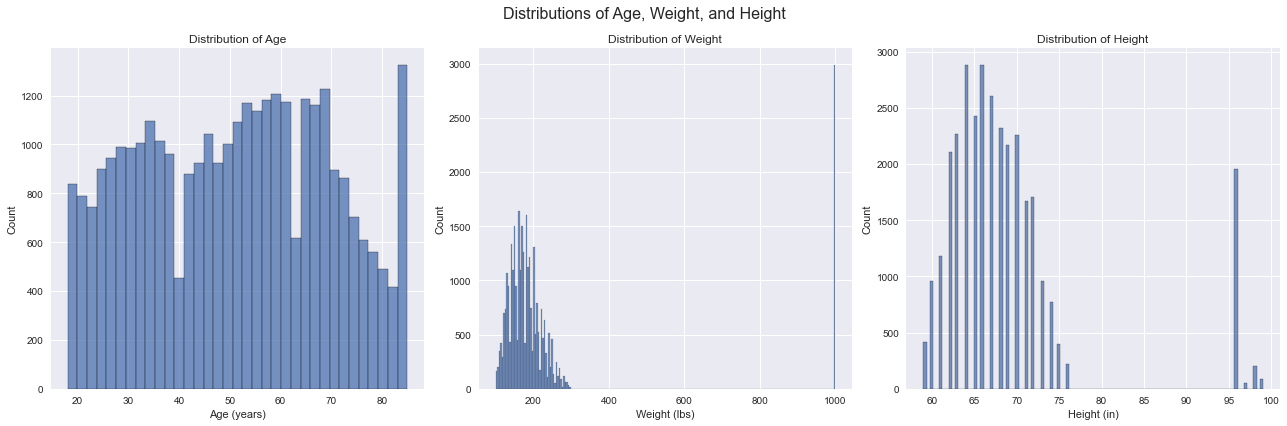

In [73]:
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distributions of Age, Weight, and Height', fontsize=16)

# Histogram for Age
sns.histplot(data=df, x='age', ax=ax1)
ax1.set_title('Distribution of Age')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Count')

# Histogram for Weight
sns.histplot(data=df, x='weight', ax=ax2)
ax2.set_title('Distribution of Weight')
ax2.set_xlabel('Weight (lbs)')
ax2.set_ylabel('Count')

# Histogram for Height
sns.histplot(data=df, x='height', ax=ax3)
ax3.set_title('Distribution of Height')
ax3.set_xlabel('Height (in)')
ax3.set_ylabel('Count')

plt.tight_layout()
plt.show()

#not much clarity for 85+
#for weight at or above 300 lbs, fill with NA (not expected from file layout reference)
#for height at or above 77 in, fll with NA (not expected from file layout reference)

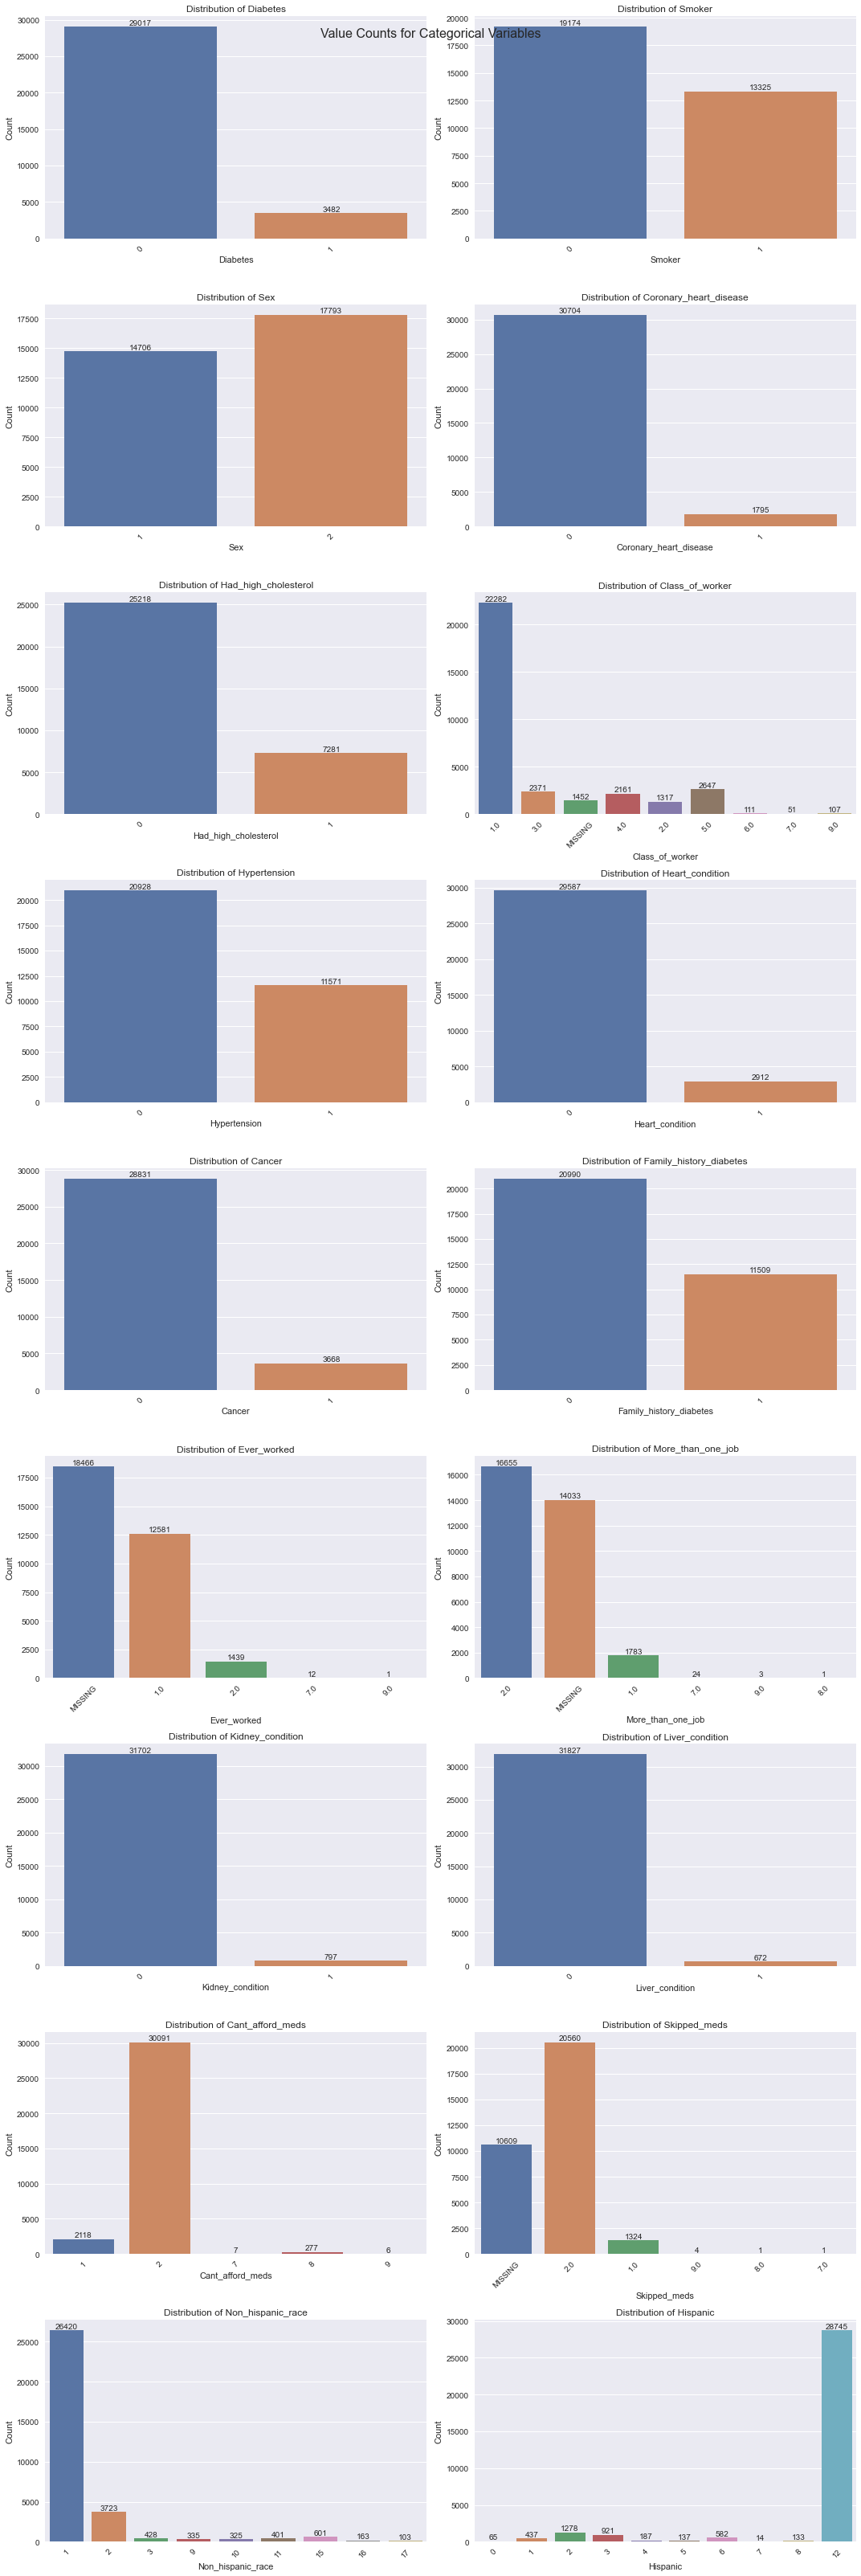

In [74]:
columns_to_plot = ["diabetes",
                   "smoker",
                   "sex",
                   "coronary_heart_disease",
                   "had_high_cholesterol",
                   "class_of_worker",
                   "hypertension",
                   "heart_condition",
                   "cancer",
                   "family_history_diabetes",
                   "ever_worked",
                   "more_than_one_job",
                   "kidney_condition",
                   "liver_condition",
                   "cant_afford_meds",
                   "skipped_meds",
                   "non_hispanic_race",
                   "hispanic"]

# Create subplots based on the number of columns to plot
n_cols = 2
n_rows = (len(columns_to_plot) + 1) // 2  # Round up to the nearest integer
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Value Counts for Categorical Variables', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create value count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels if they're too long
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 5), textcoords='offset points')

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#refused, ascertain, and don't know can be pooled as 'other'

# Feature Engineering

In [75]:
df_clean = df.copy()

#Grouping small columns together
columns_to_merge = {
    'smoker': [7, 8, 9],
    'class_of_worker': [7, 8, 9],
    'more_than_one_job': [7, 8, 9],
    'kidney_condition': [7, 8, 9],
    'liver_condition': [7, 8, 9],
    'cant_afford_meds': [7, 8, 9],
    'skipped_meds': [7, 8, 9],
    'ever_worked': [7, 8, 9],
}

for column, values in columns_to_merge.items():
    df_clean[column] = df_clean[column].replace(values, 'OTHER')

#creating meaninful names for the column vales

mapping_dict = {
    
"diabetes":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"smoker":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"coronary_heart_disease":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"had_high_cholesterol":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"hypertension":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"heart_condition":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"cancer":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"family_history_diabetes":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"kidney_condition":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"liver_condition":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},   

"sex":{1:'MALE', 2:'FEMALE','OTHER':'OTHER', 'MISSING':'MISSING'},    
"ever_worked":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"more_than_one_job":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"cant_afford_meds":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"skipped_meds":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},

"non_hispanic_race":{1:'White',2: 'Black/African American',3:'Indian (American), Alaska Native',9: 'Asian Indian' , 
                     10: 'Chinese' ,11 :'Filipino' ,15 :'Other Asian',16 :'Primary race not releasable' ,
                     17 :'Multiple race, no primary race selected','OTHER':'OTHER', 'MISSING':'MISSING'},

"hispanic":{0: 'Multiple Hispanic',1 :'Puerto Rico',2: 'Mexican',3 :'Mexican-American',4 :'Cuban/Cuban American',
            5: 'Dominican (Republic)',6: 'Central or South American',7: 'Other Latin American, not specified',8: 'Other Spanish',
            9: 'Hispanic/Latino/Spanish, non-specific',10: 'Hispanic/Latino/Spanish, type refused',
            11: 'Hispanic/Latino/Spanish, type not ascertained', 12: 'Not Hispanic/Spanish origin',
            'OTHER':'OTHER', 'MISSING':'MISSING',},

'class_of_worker':{1:'PRIVATE COMPANY', 2:'FEDERAL GOVERNMENT', 3:'STATE GOVERNMENT',
                    4:'LOCAL GOVERNMENT', 5:'SELF-EMPLOYED', 6:'IN FAMLY-OWED WITHOUT PAY', 
                    7:'Refused',8:'Not ascertained',9:"Don't know",'OTHER':'OTHER', 'MISSING':'MISSING',},
'primary_care':{0:"Don't get", 1:'Clinic/health center', 2:'Doctor office',
                    3:'ER', 4:'Outpatient', 5:'Other place', 6:'Inconsistent',
                    7:'Refused',8:'Not ascertained',9:"Don't know",'OTHER':'OTHER', 'MISSING':'MISSING',}
}

In [76]:
for key, value in mapping_dict.items():
    df_clean[key] = df_clean[key].map(value)

KeyError: 'primary_care'

In [ ]:
# df_clean.groupby(['hispanic'])['non_hispanic_race'].unique().reset_index()
#every hispanic subgroup has a combintion of every race except for Asian Indian

In [ ]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 85]
age_labels = ['Young Adult (18-25)', 'Emerging Adulthood (26-35)', 
              'Early Middle Age (36-45)', 'Midlife (46-55)', 
              'Late Middle Age (56-65)', 'Early Senior (66-75)', 
              'Senior (76-85)']

# Apply life stage categorization
df_clean['age_group'] = pd.cut(df_clean['age'], bins=age_bins, labels=age_labels)

In [ ]:
columns_to_plot = ["diabetes",
                   "smoker",
                   "sex",
                   "coronary_heart_disease",
                   "had_high_cholesterol",
                   "class_of_worker",
                   "hypertension",
                   "heart_condition",
                   "cancer",
                   "family_history_diabetes",
                   "ever_worked",
                   "more_than_one_job",
                   "kidney_condition",
                   "liver_condition",
                   "cant_afford_meds",
                   "skipped_meds",
                   "non_hispanic_race",
                   "hispanic",'age_group']

n_cols = 2
n_rows = (len(columns_to_plot) + 1) // 2  # Round up to the nearest integer
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Value Counts for Categorical Variables', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create value count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df_clean, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels if they're too long
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 5), textcoords='offset points')

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
#Nan for weight and height
df_clean.loc[df_clean['weight'] >= 300, 'weight'] = np.nan
df_clean.loc[df_clean['height'] >= 77, 'height'] = np.nan

#imputing Nan values weight and height
#stratified median for imputation based on 'sex', 'non_hispanic_race', 'hispanic' for more accurate representation of skewed values
df_clean['weight'] = df_clean.groupby(['sex', 'non_hispanic_race', 'hispanic'])['weight'].transform(lambda x: x.fillna(x.median()))
df_clean['height'] = df_clean.groupby(['sex', 'non_hispanic_race', 'hispanic'])['height'].transform(lambda x: x.fillna(x.median()))

# New BMI
df_clean['bmi'] = df_clean['weight'] / (df_clean['height'] ** 2)*703
df_clean['bmi'] = df_clean['bmi'].round(2)

# Create a figure with 3 subplots
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(12, 8))  # Unpacking 2D array
fig.suptitle('New Distributions of Age, Weight, Height and BMI', fontsize=16)

# Histogram for Age
sns.histplot(data=df_clean, x='age', ax=ax1)
ax1.set_title('Distribution of Age')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Count')

# Histogram for Weight
sns.histplot(data=df_clean, x='weight', ax=ax2)
ax2.set_title('Distribution of Weight')
ax2.set_xlabel('Weight (lbs)')
ax2.set_ylabel('Count')

# Histogram for Height
sns.histplot(data=df_clean, x='height', ax=ax3)
ax3.set_title('Distribution of Height')
ax3.set_xlabel('Height (in)')
ax3.set_ylabel('Count')

# Histogram for Height
sns.histplot(data=df_clean, x='bmi', ax=ax4)
ax4.set_title('Distribution of BMI')
ax4.set_xlabel('BMI')
ax4.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Visualizations 

In [ ]:
# Create a figure with 3 subplots
# fig, ax = plt.subplots(figsize=(12, 8))  # Unpacking 2D array
# fig.title('New Distributions of Age, Weight, Height and BMI', fontsize=16)

# Histogram for Age

for i in df_clean['non_hispanic_race'].unique():
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.histplot(data=df_clean[df_clean['non_hispanic_race']==i], x='age', label=i.upper(), stat='probability', bins=30, ax=ax)
    plt.legend(title='Race')
    plt.show()
# fig.set_title('Distribution of Age')
# fig.set_xlabel('Age (years)')
# fig.set_ylabel('Count')

In [ ]:
diabetes_counts = df_clean.groupby(['non_hispanic_race', 'diabetes']).agg({'house_family_person_id': 'count'}).reset_index()
diabetes_counts.columns = ['Race', 'Diabetes Status', 'Count']

# Step 2: Calculate totals and percentages
diabetes_counts['Total'] = diabetes_counts.groupby('Race')['Count'].transform('sum')
diabetes_counts['Percentage'] = diabetes_counts['Count'] / diabetes_counts['Total']

stacked_data = diabetes_counts.pivot(index='Race', columns='Diabetes Status', values='Percentage').fillna(0)
stacked_data.index = ['Asian Indian', 'Black/African American', 'Chinese', 'Filipino',
       ' Native American/Alaska',
       'Multiple race', 'Other Asian',
       'Not Releasable', 'White']

stacked_data.columns = ['No Diabetes', 'Diabetes']  # Assuming diabetes status 0 and 1

stacked_data.sort_values('Diabetes', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))

# Create the stacked bar chart with custom colors
plt.bar(stacked_data.index, stacked_data['No Diabetes'], label='No Diabetes')  # Custom color for No Diabetes
plt.bar(stacked_data.index, stacked_data['Diabetes'], bottom=stacked_data['No Diabetes'], label='Diabetes')  # Custom color for Diabetes

# Adding percentages on top of the bars
for i, race in enumerate(stacked_data.index):
    # Calculate the position for the No Diabetes text
    no_diabetes_pct = stacked_data['No Diabetes'].iloc[i]
    diabetes_pct = stacked_data['Diabetes'].iloc[i]

    # Place percentage for No Diabetes
    plt.text(i, no_diabetes_pct / 2, f'{int(no_diabetes_pct * 100)}%', ha='center', va='center', color='white')
    
    # Place percentage for Diabetes
    plt.text(i, no_diabetes_pct + diabetes_pct / 2, f'{int(diabetes_pct * 100)}%', ha='center', va='center', color='white')

# Adding titles and labels
plt.title('Diabetes Status by Race (as %)')
plt.xlabel('Race')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 100)}%'))  # Format y-axis as percentage
plt.legend(title='Diabetes Status')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
# create cool graphs

In [ ]:
import scipy.stats as stats

# Create a contingency table for diabetes and race
contingency_table = pd.crosstab(df_clean['diabetes'], df_clean['non_hispanic_race'])

print("Contingency Table:")
print(contingency_table)

# Perform Chi-square test of independence
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"p-value: {p}")

# Interpretation
alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis. There is a difference between races in terms of diabetes rates.")
else:
    print("Fail to reject the null hypothesis. There is no difference between races in terms of diabetes rates.")


equitably analyze what races are more affected/susceptible to diabetes emergence

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_linear = df_clean[['non_hispanic_race', 'diabetes']]

# One-hot encode the race column (create columns for each race with 0 or 1 values)
df_linear = pd.get_dummies(df_linear, columns=['non_hispanic_race'], #drop_first=True
                          )
df_linear.drop(columns=['non_hispanic_race_Multiple race, no primary race selected'], inplace=True)
# Define the independent (predictor) variables: race columns
X = df_linear.filter(like='non_hispanic_race_')  # Select all the race dummy variables

# Define the dependent variable (target): diabetes (encoded as 0 = No, 1 = Yes)
y = df_linear['diabetes'].apply(lambda x: 1 if x == 'YES' else 0)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Output the coefficients for each race
print(f"Intercept:{intercept: .4f}")
for race, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {race}: {coef:.2f}")

Prior to colonization, Native American diets were typically based on locally sourced, nutrient-dense foods, but after contact with Europeans, many communities transitioned to diets high in processed foods, sugar, and saturated fats, contributing to increased diabetes risk. 


In [ ]:
df_linear = df_clean[['non_hispanic_race', 'smoker']]

# One-hot encode the race column (create columns for each race with 0 or 1 values)
df_linear = pd.get_dummies(df_linear, columns=['non_hispanic_race'], #drop_first=True
                          )
df_linear.drop(columns=['non_hispanic_race_Multiple race, no primary race selected'], inplace=True)
# Define the independent (predictor) variables: race columns
X = df_linear.filter(like='non_hispanic_race_')  # Select all the race dummy variables

# Define the dependent variable (target): diabetes (encoded as 0 = No, 1 = Yes)
y = df_linear['smoker'].apply(lambda x: 1 if x == 'YES' else 0)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Output the coefficients for each race
print(f"Intercept:{intercept: .4f}")
for race, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {race}: {coef:.2f}")

In [ ]:
df_linear = df_clean[['non_hispanic_race', 'hypertension']]

# One-hot encode the race column (create columns for each race with 0 or 1 values)
df_linear = pd.get_dummies(df_linear, columns=['non_hispanic_race'], #drop_first=True
                          )
df_linear.drop(columns=['non_hispanic_race_Multiple race, no primary race selected'], inplace=True)
# Define the independent (predictor) variables: race columns
X = df_linear.filter(like='non_hispanic_race_')  # Select all the race dummy variables

# Define the dependent variable (target): diabetes (encoded as 0 = No, 1 = Yes)
y = df_linear['hypertension'].apply(lambda x: 1 if x == 'YES' else 0)

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Output the coefficients for each race
print(f"Intercept:{intercept: .4f}")
for race, coef in zip(X.columns, coefficients):
    print(f"Coefficient for {race}: {coef:.2f}")

African Americans have a higher risk of hypertension due to a combination of genetic factors that may make them more sensitive to salt, higher rates of obesity, potential chronic stress related to systemic racism, and socioeconomic disadvantages which can contribute to poorer dietary habits and less access to healthcare, all leading to increased blood pressure levels

# Medical Access

In [ ]:
diabetes_counts = df_clean.groupby(['non_hispanic_race', 'cant_afford_meds']).agg({'house_family_person_id': 'count'}).reset_index()

In [ ]:
diabetes_counts = df_clean.groupby(['non_hispanic_race', 'cant_afford_meds']).agg({'house_family_person_id': 'count'}).reset_index()
diabetes_counts.columns = ['Race', 'Diabetes Status', 'Count']

# Step 2: Calculate totals and percentages
diabetes_counts['Total'] = diabetes_counts.groupby('Race')['Count'].transform('sum')
diabetes_counts['Percentage'] = diabetes_counts['Count'] / diabetes_counts['Total']

stacked_data = diabetes_counts.pivot(index='Race', columns='Diabetes Status', values='Percentage').fillna(0)
stacked_data.index = ['Asian Indian', 'Black/African American', 'Chinese', 'Filipino',
       ' Native American/Alaska',
       'Multiple race', 'Other Asian',
       'Not Releasable', 'White']

stacked_data.columns = ['Can Afford', 'Other', 'Can NOT Afford']  # Assuming diabetes status 0 and 1


stacked_data.sort_values('Can NOT Afford', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))

# Plot the stacked bar chart
plt.bar(stacked_data.index, stacked_data['Can Afford'], label='Can Afford')  # First stack
plt.bar(stacked_data.index, stacked_data['Other'], bottom=stacked_data['Can Afford'], label='Other')  # Second stack
plt.bar(stacked_data.index, stacked_data['Can NOT Afford'], bottom=stacked_data['Can Afford'] + stacked_data['Other'], label='Can NOT Afford')  # Third stack

# Adding percentages on top of each stack
for i, race in enumerate(stacked_data.index):
    # Calculate the height positions for the text
    can_afford_pct = stacked_data['Can Afford'].iloc[i]
    other_pct = stacked_data['Other'].iloc[i]
    can_not_afford_pct = stacked_data['Can NOT Afford'].iloc[i]
    
    # Place percentage for 'Can Afford'
    plt.text(i, can_afford_pct / 2, f'{int(can_afford_pct * 100)}%', ha='center', va='center', color='white')
    
    # Place percentage for 'Other'
    plt.text(i, can_afford_pct + other_pct / 2, f'{int(other_pct * 100)}%', ha='center', va='center', color='white')
    
    # Place percentage for 'Can NOT Afford'
    plt.text(i, can_afford_pct + other_pct + can_not_afford_pct / 2, f'{int(can_not_afford_pct * 100)}%', ha='center', va='center', color='white')

# Adding titles and labels
plt.title('Diabetes Status by Race (as %)')
plt.xlabel('Race')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 100)}%'))  # Format y-axis as percentage
plt.legend(title='Diabetes Status')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
df_clean.columns

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Step 1: Group by 'non_hispanic_race' and 'skipped_meds' and count occurrences
diabetes_counts = df_clean.groupby(['non_hispanic_race', 'skipped_meds']).agg({'house_family_person_id': 'count'}).reset_index()
diabetes_counts.columns = ['Race', 'Skipped Meds Status', 'Count']

# Step 2: Calculate totals and percentages
diabetes_counts['Total'] = diabetes_counts.groupby('Race')['Count'].transform('sum')
diabetes_counts['Percentage'] = diabetes_counts['Count'] / diabetes_counts['Total']

# Step 3: Pivot the data to get 'YES', 'NO', 'OTHER', and 'MISSING' in columns
stacked_data = diabetes_counts.pivot(index='Race', columns='Skipped Meds Status', values='Percentage').fillna(0)

# Optional: Rename index for better readability
stacked_data.index = ['Asian Indian', 'Black/African American', 'Chinese', 'Filipino',
                      'Native American/Alaska', 'Multiple race', 'Other Asian', 'Not Releasable', 'White']

# Step 4: Sort values by 'YES' column to order the chart
stacked_data.sort_values('YES', ascending=False, inplace=True)

# Step 5: Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(stacked_data.index, stacked_data['YES'], label='YES')  # First stack
plt.bar(stacked_data.index, stacked_data['NO'], bottom=stacked_data['YES'], label='NO')  # Second stack
plt.bar(stacked_data.index, stacked_data['OTHER'], bottom=stacked_data['YES'] + stacked_data['NO'], label='OTHER')  # Third stack
plt.bar(stacked_data.index, stacked_data['MISSING'], bottom=stacked_data['YES'] + stacked_data['NO'] + stacked_data['OTHER'], label='MISSING')  # Fourth stack

# Adding percentages on top of each stack
for i, race in enumerate(stacked_data.index):
    # Retrieve the percentage for each stack
    yes_pct = stacked_data['YES'].iloc[i]
    no_pct = stacked_data['NO'].iloc[i]
    other_pct = stacked_data['OTHER'].iloc[i]
    missing_pct = stacked_data['MISSING'].iloc[i]
    
    # Place percentage for 'YES'
    plt.text(i, yes_pct / 2, f'{int(yes_pct * 100)}%', ha='center', va='center', color='white')
    
    # Place percentage for 'NO'
    plt.text(i, yes_pct + no_pct / 2, f'{int(no_pct * 100)}%', ha='center', va='center', color='white')
    
    # Place percentage for 'OTHER'
    plt.text(i, yes_pct + no_pct + other_pct / 2, f'{int(other_pct * 100)}%', ha='center', va='center', color='white')
    
    # Place percentage for 'MISSING'
    plt.text(i, yes_pct + no_pct + other_pct + missing_pct / 2, f'{int(missing_pct * 100)}%', ha='center', va='center', color='white')

# Adding titles and labels
plt.title('Skipped Meds Status by Race (as %)')
plt.xlabel('Race')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 100)}%'))  # Format y-axis as percentage
plt.legend(title='Skipped Meds Status')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

In [ ]:
diabetes_counts

In [ ]:
diabetes_counts = df_clean.groupby(['non_hispanic_race', 'skipped_meds']).agg({'house_family_person_id': 'count'}).reset_index()
diabetes_counts.columns = ['Race', 'Skipped Meds Status', 'Count']

# Step 2: Exclude 'Not Releasable' and 'MISSING' values
diabetes_counts = diabetes_counts[diabetes_counts['Race'] != 'Primary race not releasable']
diabetes_counts = diabetes_counts[diabetes_counts['Skipped Meds Status'] != 'MISSING']
diabetes_counts = diabetes_counts[diabetes_counts['Skipped Meds Status'] != 'OTHER']


# Step 3: Calculate totals and percentages
diabetes_counts['Total'] = diabetes_counts.groupby('Race')['Count'].transform('sum')
diabetes_counts['Percentage'] = diabetes_counts['Count'] / diabetes_counts['Total']

# Step 4: Pivot the data to get 'YES', 'NO', and 'OTHER' in columns
stacked_data = diabetes_counts.pivot(index='Race', columns='Skipped Meds Status', values='Percentage').fillna(0)

# Optional: Rename index for better readability (assuming the races present in your data)
stacked_data.index = ['Asian Indian', 'Black/African American', 'Chinese', 'Filipino',
                      'Native American/Alaska', 'Multiple race', 'Other Asian', 'White']

# Step 5: Sort values by 'YES' column to order the chart
stacked_data.sort_values('YES', ascending=False, inplace=True)

# Step 6: Plot the stacked bar chart
plt.figure(figsize=(10, 6))

# Plot the stacked bars
plt.bar(stacked_data.index, stacked_data['YES'], label='YES')  # First stack
plt.bar(stacked_data.index, stacked_data['NO'], bottom=stacked_data['YES'], label='NO')  # Second stack

# Adding percentages on top of each stack
for i, race in enumerate(stacked_data.index):
    # Retrieve the percentage for each stack
    yes_pct = stacked_data['YES'].iloc[i]
    no_pct = stacked_data['NO'].iloc[i]
    
    # Place percentage for 'YES'
    plt.text(i, yes_pct / 2, f'{int(yes_pct * 100)}%', ha='center', va='center', color='white')
    
    # Place percentage for 'NO'
    plt.text(i, yes_pct + no_pct / 2, f'{int(no_pct * 100)}%', ha='center', va='center', color='white')
    
# Adding titles and labels
plt.title('Skipped Meds Status by Race (as %)')
plt.xlabel('Race')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 100)}%'))  # Format y-axis as percentage
plt.legend(title='Skipped Meds Status')

plt.tight_layout()
plt.show()